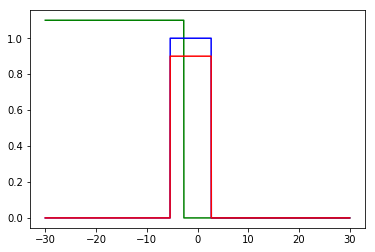

In [1]:
from weichselSchwarz import *
from numpy import pi, sin, cos, arccos, sqrt, median, convolve, diagonal, corrcoef, argmax, insert, cumsum, std, unique, savetxt, vstack, nanstd, nanmean, hstack, NaN, zeros, correlate, ones
from matplotlib.pyplot import *
from matplotlib.cm import *
%matplotlib inline

# Parameter values for the simulation.
N = 200 # initial number of filaments
dN = 2.7 # length of a monomer, in nm
filRange = 1000.0 # width of the leading edge, in nm
T = 10.0 # simulation run time, in s
dt = 0.0027 # duration of time interval, in s
ds = 2.0 # frame rate
dw = 2 * dN # width of branching zone, in nm

# Rate functions.
# Elongation
lambdaRate = dN / dt
def rLambda(x, y, t):
    return lambdaRate * heavisideTheta(y, dw)

# Branching
betaRate = 7410.0
def rBeta(x, y, t):
    return betaRate * heavisidePi(y, dw)

# Capping
kappaRate = 18.5 # per filament
def rKappa(x, y, t):
    return kappaRate * heavisidePi(y, dw)

# Plot rate functions.
a = arange(-30, 30, 0.01)
plot(a, [1.1 * rLambda(0, y, 0) / lambdaRate for y in a], 'g')
plot(a, [rBeta(0, y, 0) / betaRate for y in a], 'b')
plot(a, [0.9 * rKappa(0, y, 0) / kappaRate for y in a], 'r')

In [2]:
# Sample from uniform distribution given N filaments.
thetaDist = uniform(-pi / 2.0, pi / 2.0, size = N)
xDist = uniform(low = 0.0, high = filRange, size = N)
yDist = uniform(low = -dw, high = 0.0, size = N)

xInit = array([[x, y] for x, y in zip(xDist, yDist)])
dxInit = array([[dN * sin(theta), dN * cos(theta)] for theta in thetaDist])

# Network velocity
vNetwork = 0.95 * dN / dt # in nm/s

# Initialize object.
n = network(rLambda, rBeta, rKappa, xSeed = xInit, dxSeed = dxInit, branchSigma = 15.0 * pi / 180, networkVel = vNetwork, forceDirection= True, recordHistory = True)
n.exportData(dt, ds, n.tElapsed + T, Fext = 1.0e-1)

/home/jiongyi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0, 985.07956495458541)

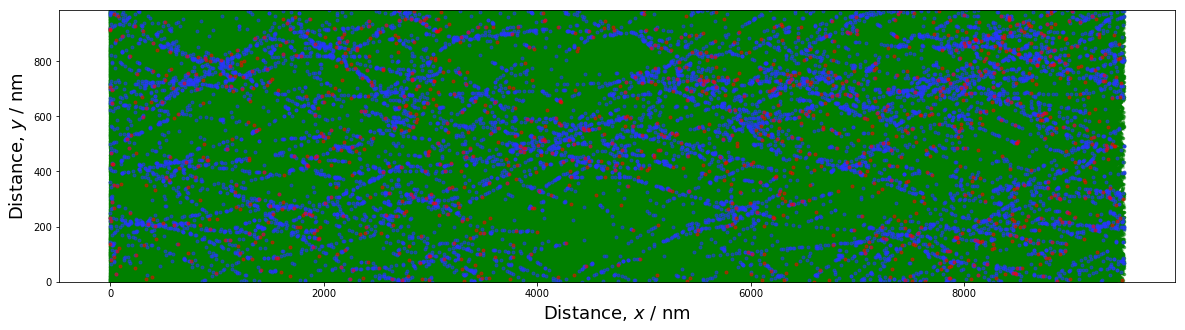

In [3]:
# Plot network.
xFil = n.getPositions(n.Monomers)
xBranch = n.getPositions(n.Branches)
xCap = n.getPositions(n.Caps)
figure(figsize=(20,5))
plot(xFil.T[1], xFil.T[0], 'g', marker = ".", linewidth = 0, ms = 5, alpha = 0.2)
if len(xBranch) != 0:
    plot(xBranch.T[1], xBranch.T[0], '#2737ff', marker = ".", linewidth = 0, ms = 6, alpha = 0.5)
if len(xCap) != 0:
    plot(xCap.T[1], xCap.T[0], '#ff0000', marker = ".", linewidth = 0, ms = 6, alpha = 0.5)
xlabel(r"Distance, $x$ / nm", fontsize = 18)
ylabel(r"Distance, $y$ / nm", fontsize = 18)
ylim(0, n.xBoundary)